In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix,ConfusionMatrixDisplay


# 1.Data loading:

In [159]:
df=pd.read_csv("C:\\Users\\Hp\\OneDrive\\Desktop\\ML Reinforcement\\ipl_matches.csv")

In [160]:
data=df.copy()

In [161]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [162]:
print(data.describe())

                 id  dl_applied  win_by_runs  win_by_wickets
count    756.000000  756.000000   756.000000      756.000000
mean    1792.178571    0.025132    13.283069        3.350529
std     3464.478148    0.156630    23.471144        3.387963
min        1.000000    0.000000     0.000000        0.000000
25%      189.750000    0.000000     0.000000        0.000000
50%      378.500000    0.000000     0.000000        4.000000
75%      567.250000    0.000000    19.000000        6.000000
max    11415.000000    1.000000   146.000000       10.000000


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [164]:
print(data.select_dtypes(include='object').columns)

Index(['Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'winner', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')


In [165]:
data.shape

(756, 18)

In [166]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Droping unwanted columns

In [167]:
data=data.drop("umpire3",axis=1)

In [168]:
data=data.drop("id",axis=1)

In [169]:
cols_to_drop=[
    "player_of_match","umpire1","umpire2","result","date"]
data.drop(columns=cols_to_drop,inplace=True)

In [170]:
print("Remaining Colunms: ",data.columns.tolist())

Remaining Colunms:  ['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'venue']


In [171]:
data.isnull().sum()

Season            0
city              7
team1             0
team2             0
toss_winner       0
toss_decision     0
dl_applied        0
winner            4
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

In [172]:
data["city"]=data["city"].fillna("Dubai")

In [173]:
data["winner"]=data["winner"].fillna("No Result")

#### Null values filled

In [174]:
data.isnull().sum()

Season            0
city              0
team1             0
team2             0
toss_winner       0
toss_decision     0
dl_applied        0
winner            0
win_by_runs       0
win_by_wickets    0
venue             0
dtype: int64

### Rectifying Inconsistencies

In [175]:
# Define the replacement dictionary
team_replacements = {
    "Rising Pune Supergiant": "Rising Pune Supergiants",
    "Delhi Daredevils": "Delhi Capitals",
}

In [176]:
columns_to_update = ['team1', 'team2', 'winner', 'toss_winner']

for col in columns_to_update:
    data[col] = data[col].replace(team_replacements)

In [177]:
data["team1"].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [178]:
data["city"]=data["city"].replace("Bengaluru","Bangalore")

# Converting categorical columns to numerical colunm

#### One-Hot Encoding

In [179]:
# One Hot Encoding
cat_cols = ['team1', 'team2',"Season","city","venue"]  
data_encoded = pd.get_dummies(data, columns=cat_cols)

In [180]:
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'bool':
        data_encoded[col] = data_encoded[col].astype(int)


In [181]:
print(data_encoded.dtypes.value_counts())

int64     114
object      3
Name: count, dtype: int64


In [182]:
print(data_encoded.select_dtypes(include='object').columns)


Index(['toss_winner', 'toss_decision', 'winner'], dtype='object')


#### Label Encoding

In [183]:
# label encoding for winner and toss decision
le = LabelEncoder()
data_encoded['toss_decision'] = le.fit_transform(data_encoded['toss_decision'])

data_encoded["winner"]=le.fit_transform(data_encoded["winner"])

data_encoded["toss_winner"]=le.fit_transform(data_encoded["toss_winner"])

In [184]:
print(data_encoded["toss_decision"].unique())

[1 0]


In [185]:
print(data_encoded["toss_decision"].unique())


[1 0]


In [186]:
print(data_encoded["toss_winner"].unique())

[11 10  6  4 12  7  3  2  0  9  1  5  8]


# Checking Outliers

In [187]:
print(data.select_dtypes(include=['int64','int32', 'float64']).columns)

Index(['dl_applied', 'win_by_runs', 'win_by_wickets'], dtype='object')


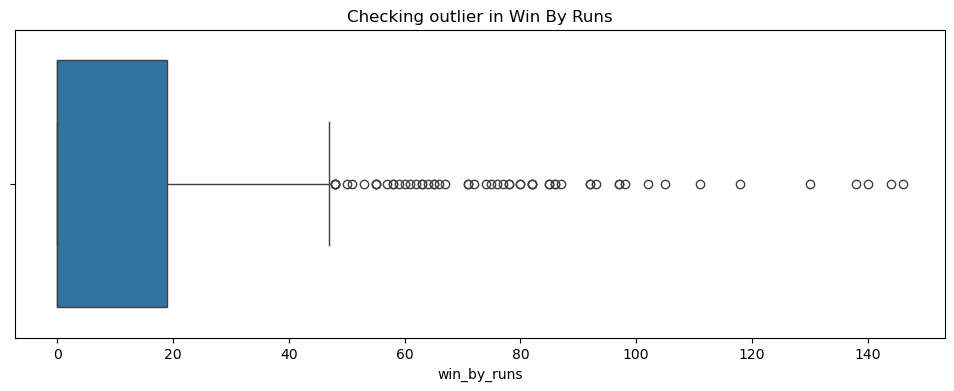

In [188]:
plt.figure(figsize=(12,4))
sns.boxplot(x=data["win_by_runs"])
plt.title("Checking outlier in Win By Runs")
plt.show()

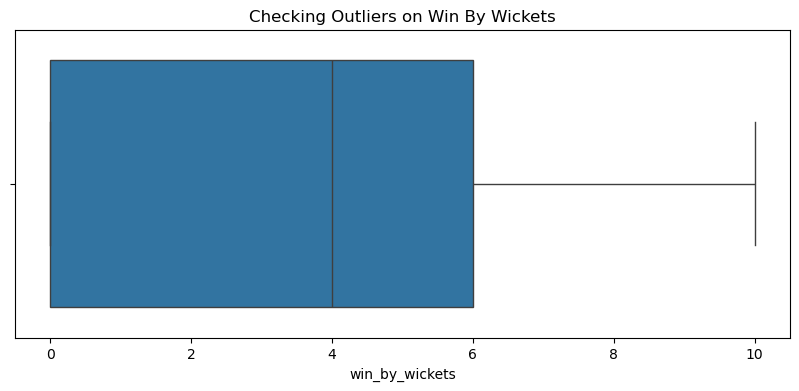

In [189]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data["win_by_wickets"])
plt.title("Checking Outliers on Win By Wickets")
plt.show()

# Observation on Data Cleaning

* Missing values in Winner column is replaced by "No Result" and city with "Dubai".

* In Umpire 3 column has 84% of missing values so i droped it.

* Dropping unwanted columns like Id, Umpire, venue, Season, Date, Player of match, Win by runs and Win by wickets.

* Rectified inconsistent values.

* Used One-Hot Encoding and Labelled Encoding.

* Checked for Outliers.

# Exploratory Data Analysis

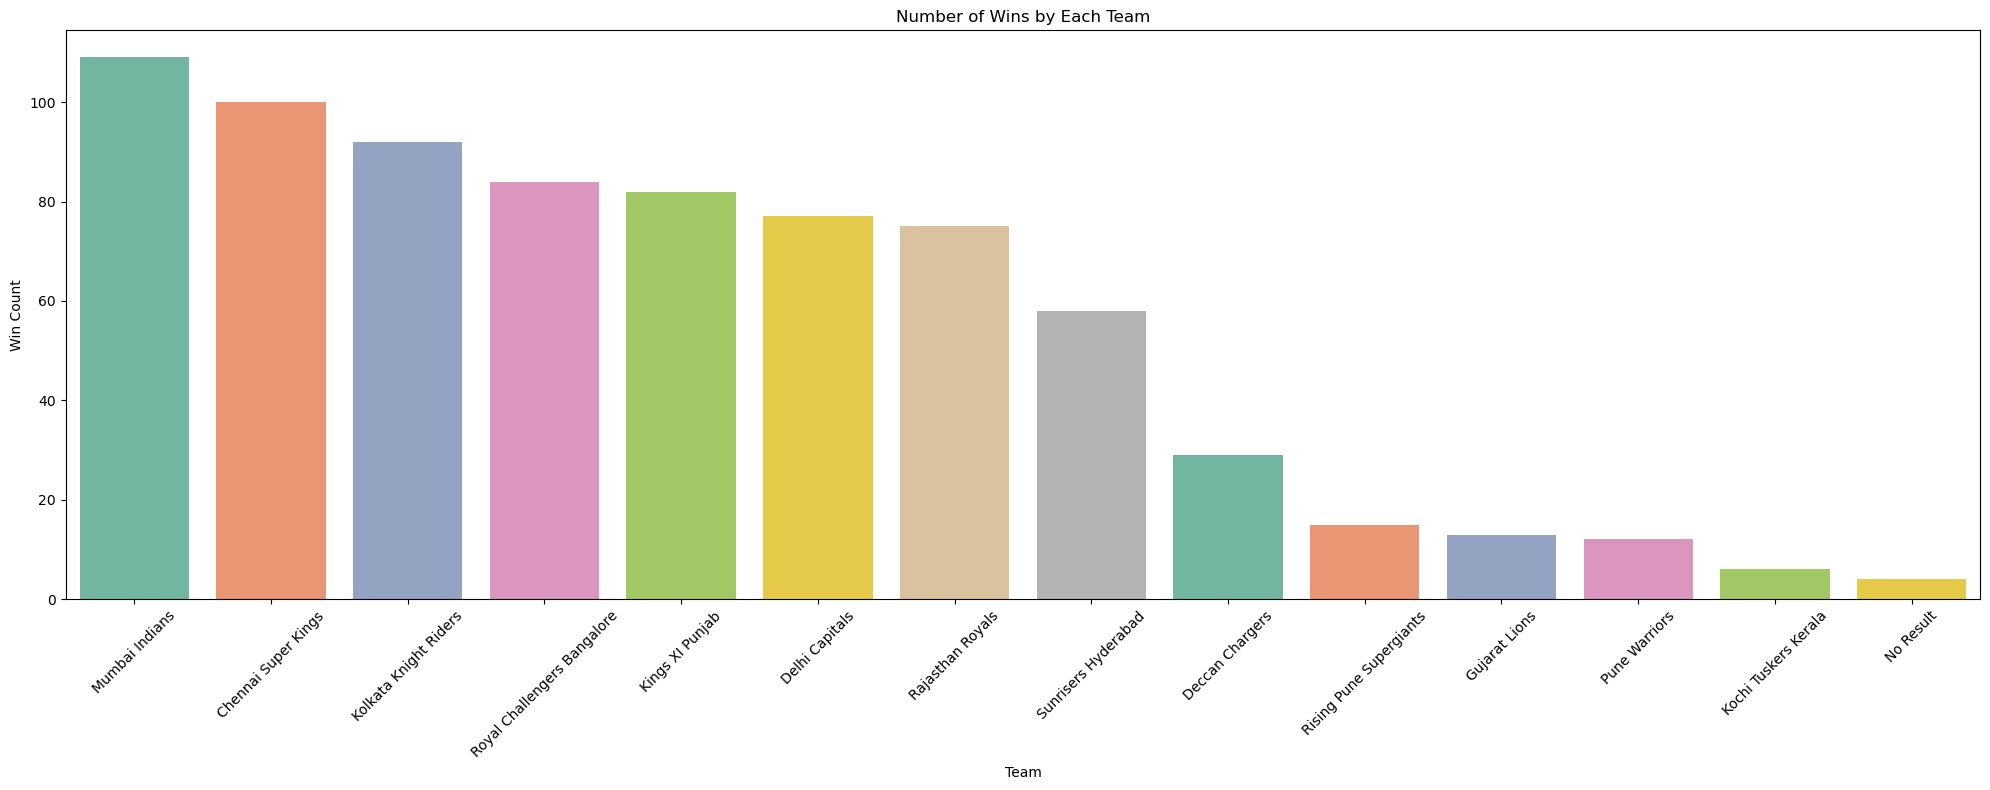

In [190]:
plt.figure(figsize=(20,8))
sns.countplot(x='winner', data=data, palette='Set2', order=data['winner'].value_counts().index)
plt.title('Number of Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Win Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


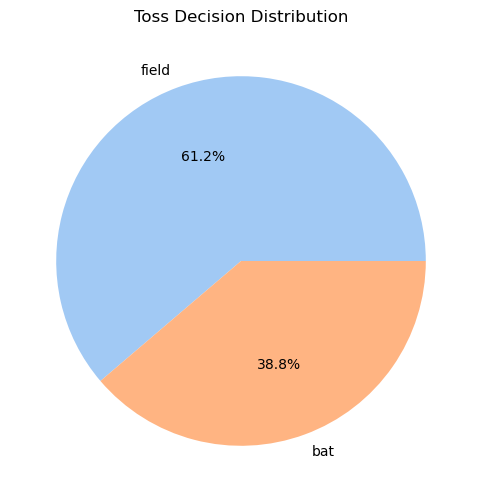

In [191]:
toss_counts = data['toss_decision'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(toss_counts, labels=toss_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Toss Decision Distribution")
plt.show()


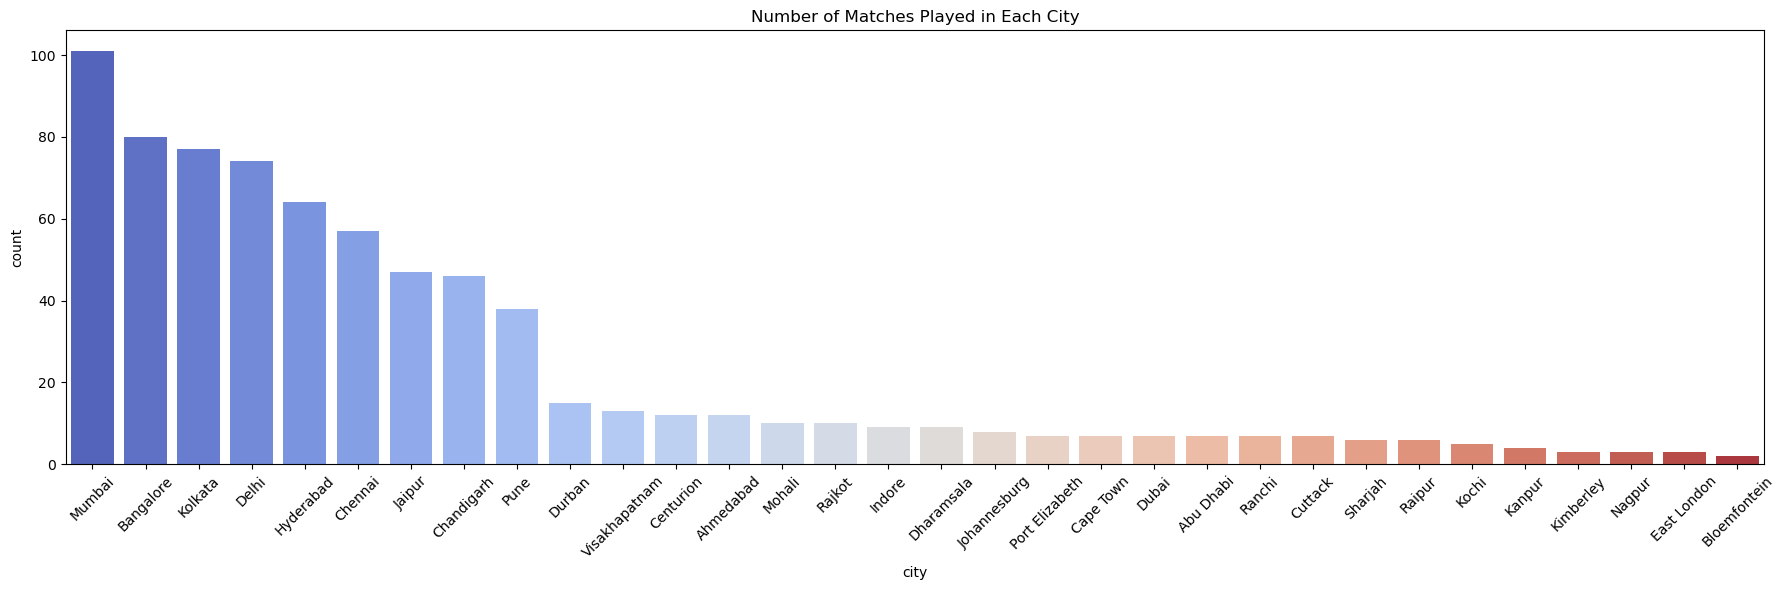

In [192]:
plt.figure(figsize=(18,6))
sns.countplot(x='city', data=data, palette='coolwarm', order=data['city'].value_counts().index)
plt.title('Number of Matches Played in Each City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


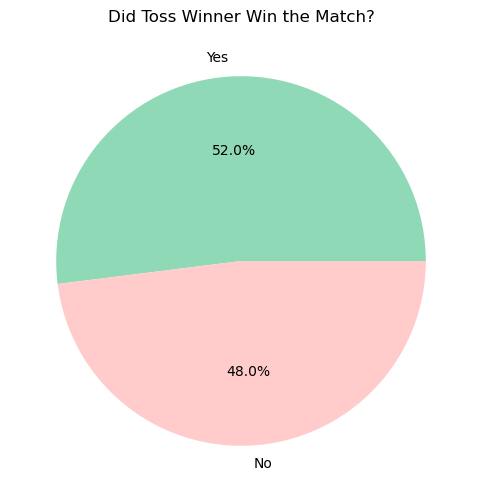

In [193]:
same = (data['toss_winner'] == data['winner']).value_counts()
plt.figure(figsize=(6,6))
plt.pie(same, labels=['Yes', 'No'], autopct='%1.1f%%', colors=['#8fd9b6','#ffcccb'])
plt.title("Did Toss Winner Win the Match?")
plt.show()


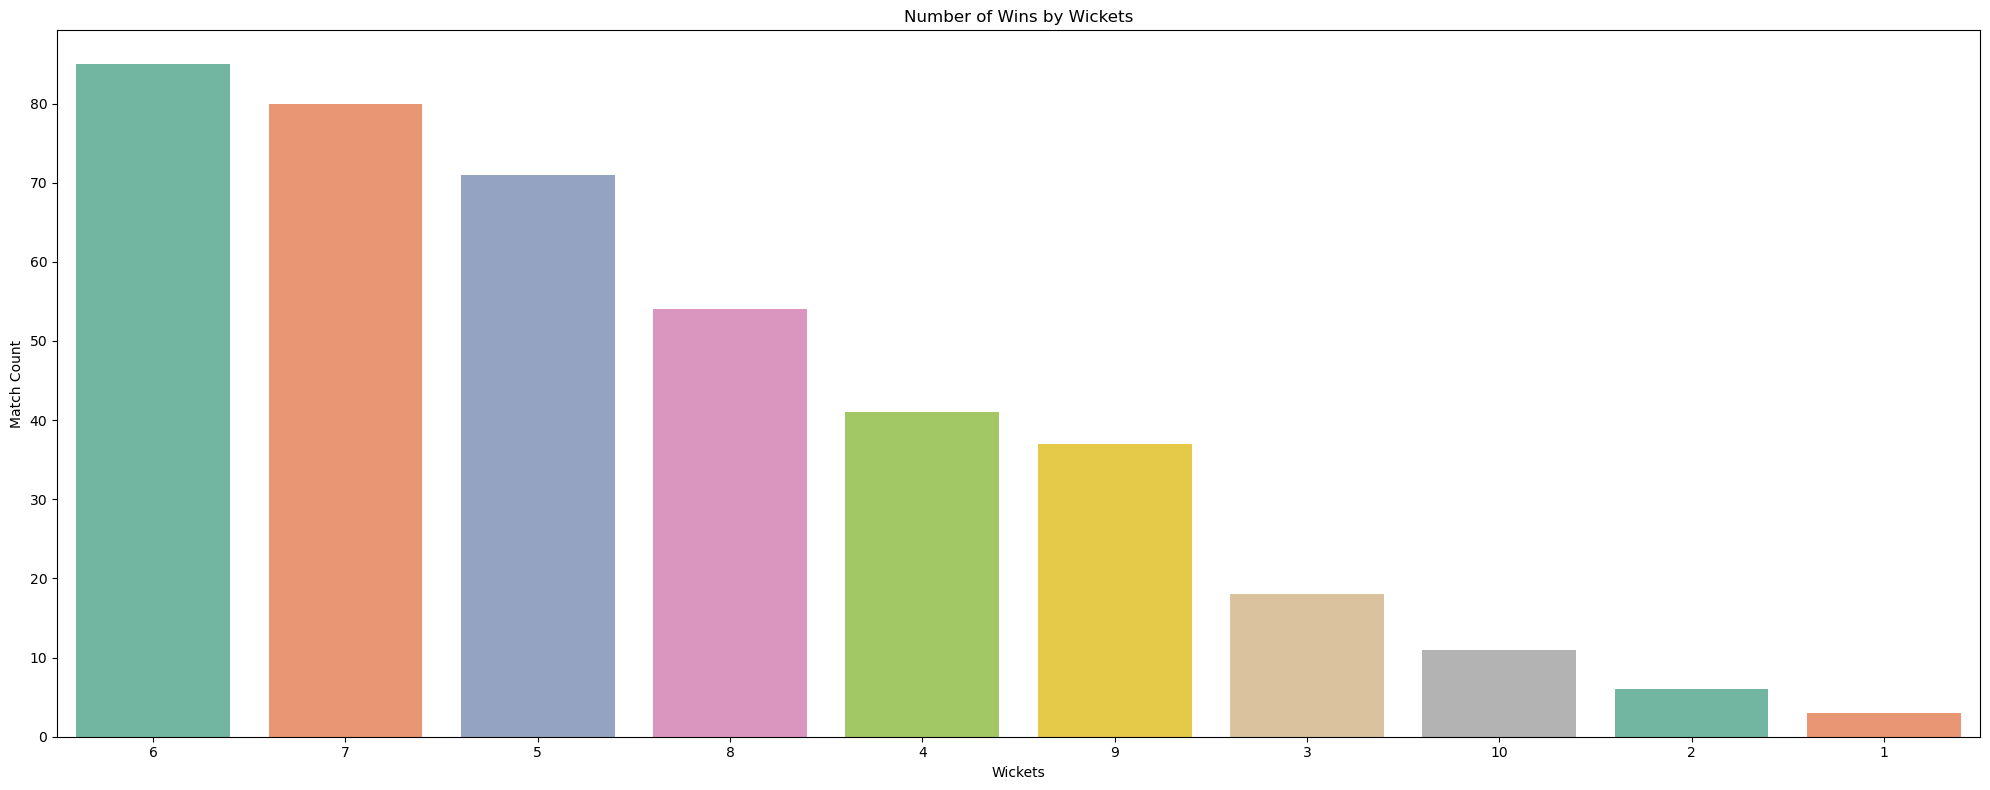

In [194]:
plt.figure(figsize=(20,8))
filtered_data=data[data["win_by_wickets"]!=0]

sns.countplot(x='win_by_wickets', data=filtered_data, palette='Set2', order=filtered_data['win_by_wickets'].value_counts().index)
plt.title('Number of Wins by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Match Count')
plt.tight_layout()
plt.show()


In [195]:
selected_features = ['toss_decision', 'toss_winner', 'winner',"win_by_wickets","win_by_runs"]
df_selected = df[selected_features].copy()


In [196]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_selected.columns:
    df_selected[col] = le.fit_transform(df_selected[col])


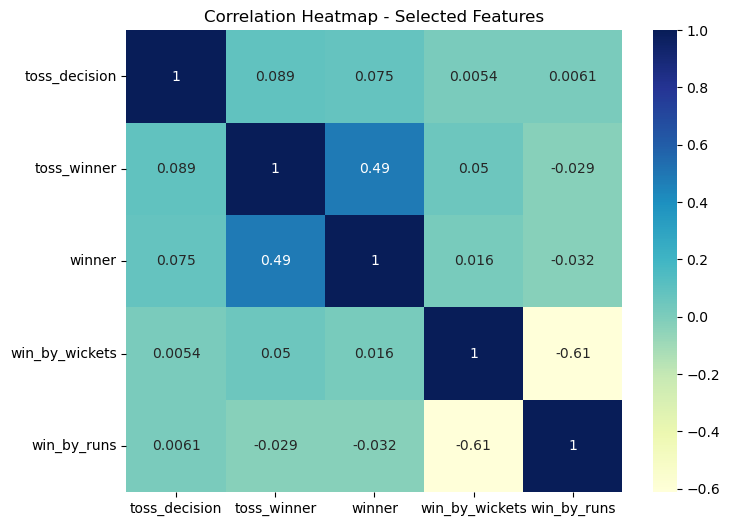

In [197]:
plt.figure(figsize=(8,6))
sns.heatmap(df_selected.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap - Selected Features')
plt.show()

# Observations on EDA

* Mumbai Indians won 110 matches followed by Chennai Super Kings with 100 wins.

* 61% of teams choosing Bowling after winning the Toss.

* Toss winning team have 52% of winning rate to win the match.

* 100 matches are played on Mumbai City followed by Kolkata and Delhi.

* Good correlation between toss winner and winner so toss winner impacting the match winner.

# Data Preprocessing

### Splitting data into training and testing

In [198]:
X = data_encoded.drop('winner', axis=1)   # All features except winner
y = data_encoded['winner']                # Target label is winner

### Train Test Split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Training and Testing

### Defining all models

In [200]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [201]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 3),
        "Precision": round(precision_score(y_test, y_pred, average='weighted', zero_division=0), 3),
        "Recall": round(recall_score(y_test, y_pred, average='weighted'), 3),
        "F1 Score": round(f1_score(y_test, y_pred, average='weighted'), 3)
    })

df_results = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(df_results)

                 Model  Accuracy  Precision  Recall  F1 Score
5              XGBoost     0.974      0.971   0.974     0.971
3        Decision Tree     0.882      0.889   0.882     0.880
4        Random Forest     0.882      0.879   0.882     0.877
0  Logistic Regression     0.539      0.534   0.539     0.529
2                  KNN     0.500      0.505   0.500     0.490
1                  SVM     0.250      0.125   0.250     0.162


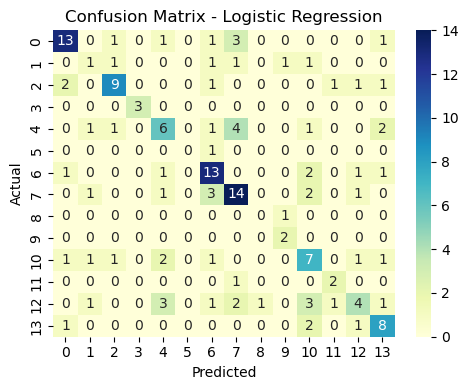

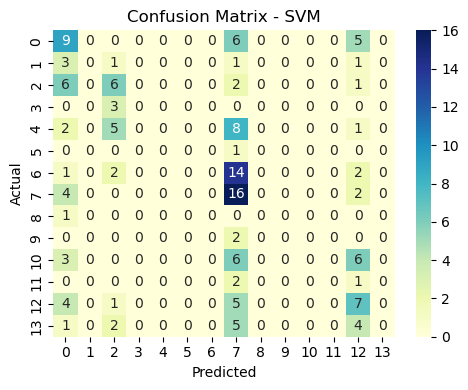

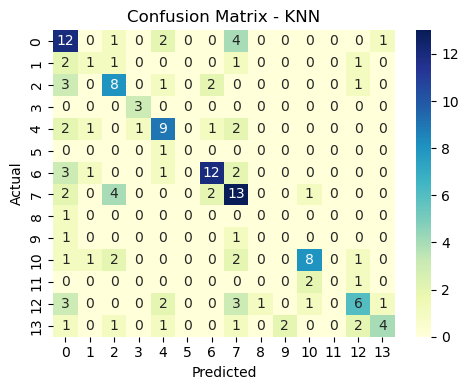

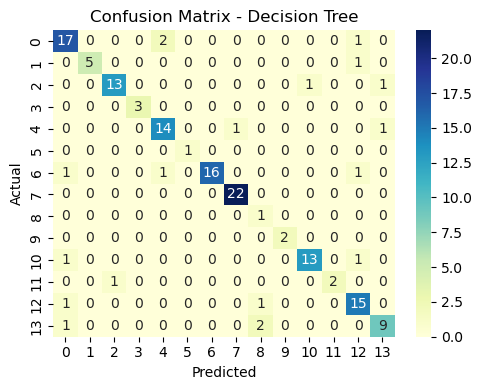

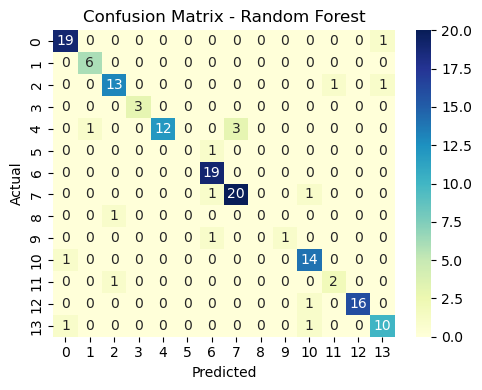

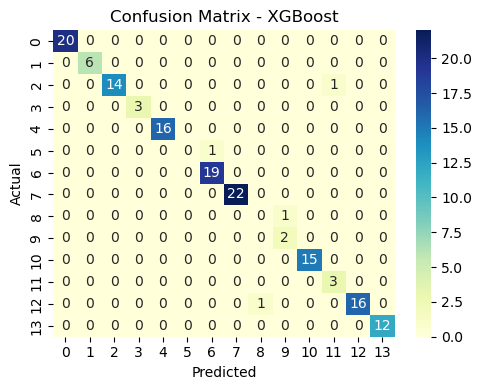

In [202]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


# Model Comparison

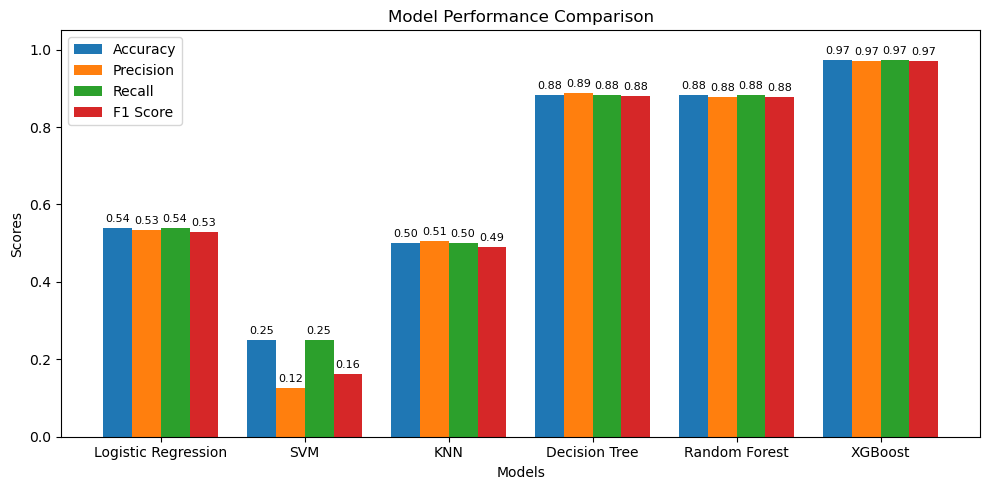

In [203]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = results_df['Model']
bar_width = 0.2
x = np.arange(len(models))

for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, results_df[metric], width=bar_width, label=metric)

    for j in range(len(models)):
        plt.text(x[j] + i * bar_width, results_df[metric][j] + 0.01, f"{results_df[metric][j]:.2f}",
                 ha='center', va='bottom', fontsize=8)

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x + bar_width * 1.5,models)
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()

plt.show()

# Hyperparameter Tuning - Grid Search CV

### Choosing XGBoost, Random Forest and Decision Tree for Tuning

In [204]:
from sklearn.model_selection import GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)

grid_xgb.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)

print("Best Parameters and Accuracy Scores:")
print("XGBoost Best Params         :", grid_xgb.best_params_)
print("XGBoost Best Accuracy       :", grid_xgb.best_score_)

print("Random Forest Best Params   :", grid_rf.best_params_)
print("Random Forest Best Accuracy :", grid_rf.best_score_)

print("Decision Tree Best Params   :", grid_dt.best_params_)
print("Decision Tree Best Accuracy :", grid_dt.best_score_)


Best Parameters and Accuracy Scores:
XGBoost Best Params         : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
XGBoost Best Accuracy       : 0.9751654269904603
Random Forest Best Params   : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best Accuracy : 0.8559512667684679
Decision Tree Best Params   : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Best Accuracy : 0.8277424757401114


In [205]:
best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=150,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100
)

best_dt = DecisionTreeClassifier(
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=2
)

best_xgb.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
best_dt.fit(X_train, y_train)

models = {
    "XGBoost": best_xgb,
    "Random Forest": best_rf,
    "Decision Tree": best_dt
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1 Score: {f1:.3f}")


XGBoost Evaluation:
Accuracy: 0.980
Precision: 0.983
Recall: 0.980
F1 Score: 0.980

Random Forest Evaluation:
Accuracy: 0.882
Precision: 0.879
Recall: 0.882
F1 Score: 0.878

Decision Tree Evaluation:
Accuracy: 0.868
Precision: 0.873
Recall: 0.868
F1 Score: 0.860


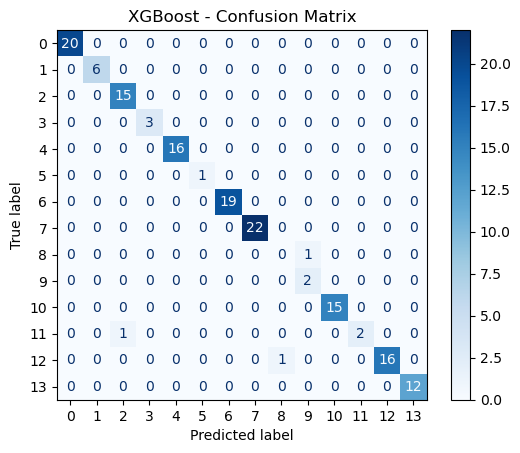

In [208]:
best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=150,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

best_xgb.fit(X_train, y_train)

y_pred = best_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("XGBoost - Confusion Matrix")
plt.show()


# Saving Model in Pickle Module

In [209]:
import pickle 

with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)


In [210]:
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X_test)


# Checking the Model

In [211]:
import os

print(os.path.exists('xgb_model.pkl'))  # Output will be True if the file exists


True


# Final Model and its Preformances

* The Best Model is XGBoost

* Highest Performance Metrics


* Balanced Performance


* Minimal Misclassifications


* Consistently identifies correct classes.


# Conclusion

### Further Improvements

* Advanced Hyperparameter Tuning by using Bayesian Optimization

* Continuous Learning with new latest data


* Model Monitoring and continue tuning


### Additional Features

* Weather Conditions

* Head-to-Head History

* Venue Specific Statistics

### Challenges 

* Model building and training

* Visualizing Performances Metrics